# EDA Continued: Challenge Set 1 Review, Data Checking & Cleaning with Pandas and Viz Tools

Aka, learning how to always expect your data to have more problems.

**Learning Goals**:

1. Review core pandas methods and understand their application to challenge set 1
2. Understand basic methods for data quality checking and cleaning 
3. See examples of how to use visualization as an aid in exploring data quality 

In [141]:
from __future__ import print_function, division

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [143]:
import datetime

#### Exercise 1.1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Read them into a pandas dataframe (pd.read_csv()), format the columns nicely, and display the first few rows.

In [144]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "data/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200912, 200919, 200926]
turnstiles_df = get_data(week_nums)

In [145]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,00:00:00,REGULAR,7453934,2534625
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,04:00:00,REGULAR,7453939,2534627
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,08:00:00,REGULAR,7453951,2534645
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,12:00:00,REGULAR,7453997,2534689
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,16:00:00,REGULAR,7454097,2534727


In [146]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [147]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [148]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [149]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,00:00:00,REGULAR,7453934,2534625
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,04:00:00,REGULAR,7453939,2534627
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,08:00:00,REGULAR,7453951,2534645
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,12:00:00,REGULAR,7453997,2534689
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,16:00:00,REGULAR,7454097,2534727


In [150]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,05:00:00,REGULAR,5554,541
209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,09:00:00,REGULAR,5554,541
209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,13:00:00,REGULAR,5554,541
209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,17:00:00,REGULAR,5554,541
209829,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,21:00:00,REGULAR,5554,541


In [151]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

09/05/2020    30551
09/06/2020    29557
09/07/2020    29509
09/08/2020    29707
09/09/2020    29514
09/10/2020    29508
09/11/2020    32239
09/12/2020    32195
09/13/2020    30530
09/14/2020    29597
09/15/2020    29397
09/16/2020    29316
09/17/2020    29381
09/18/2020    29245
09/19/2020    30408
09/20/2020    29869
09/21/2020    30829
09/22/2020    29651
09/23/2020    29814
09/24/2020    29603
09/25/2020    29656
Name: DATE, dtype: int64


#### Exercise 1.2

- Let's turn this into a time series. Create a new column that stores the date and time as a single pandas datetime object.

In [152]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [153]:
from datetime import datetime as dt

In [154]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [155]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,00:00:00,REGULAR,7453934,2534625,2020-09-05 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,04:00:00,REGULAR,7453939,2534627,2020-09-05 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,08:00:00,REGULAR,7453951,2534645,2020-09-05 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,12:00:00,REGULAR,7453997,2534689,2020-09-05 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,16:00:00,REGULAR,7454097,2534727,2020-09-05 16:00:00


Alternatively, pandas is so good that it can even automatically parse datetimes as you load in data if you tell it to, as below.

In [156]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "data/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [200912, 200919, 200926]
turnstiles_df_2 = get_data_parse_dt(week_nums)
turnstiles_df_2.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2020-09-05 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,00:00:00,REGULAR,7453934,2534625
1,2020-09-05 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,04:00:00,REGULAR,7453939,2534627
2,2020-09-05 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,08:00:00,REGULAR,7453951,2534645
3,2020-09-05 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,12:00:00,REGULAR,7453997,2534689
4,2020-09-05 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,16:00:00,REGULAR,7454097,2534727


### Now let's run some diagnostics on the data and see approaches to cleaning before tackling exercise 3

We can isolate specific turnstiles by creating boolean series masks, then using them to index into the dataframe: 

In [157]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,00:00:00,REGULAR,7453934,2534625,2020-09-05 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,04:00:00,REGULAR,7453939,2534627,2020-09-05 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,08:00:00,REGULAR,7453951,2534645,2020-09-05 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,12:00:00,REGULAR,7453997,2534689,2020-09-05 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/05/2020,16:00:00,REGULAR,7454097,2534727,2020-09-05 16:00:00


In [158]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
203990,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/05/2020,00:00:00,REGULAR,15635211,3453797,2020-09-05 00:00:00
203991,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/05/2020,04:00:00,REGULAR,15635212,3453801,2020-09-05 04:00:00
203992,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/05/2020,08:00:00,REGULAR,15635315,3453811,2020-09-05 08:00:00
203993,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/05/2020,12:00:00,REGULAR,15635474,3453861,2020-09-05 12:00:00
203994,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/05/2020,16:00:00,REGULAR,15635663,3453910,2020-09-05 16:00:00


In [159]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
137440,N007A,R174,00-00-00,181 ST,2020-09-23 13:00:00,2
501009,R245A,R051,01-00-00,59 ST,2020-09-12 08:00:00,2
113639,H039,R375,00-00-01,NEW LOTS,2020-09-22 05:00:00,2
611720,R627,R063,00-00-01,SUTTER AV-RUTLD,2020-09-08 00:00:00,2
611718,R627,R063,00-00-01,SUTTER AV-RUTLD,2020-09-07 16:00:00,2


In [160]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "N007A") & 
(turnstiles_df["UNIT"] == "R174") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "181 ST") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 9, 23).date()))
turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
46404,N007A,R174,00-00-00,181 ST,A,IND,09/23/2020,01:00:00,REGULAR,10731822,11585855,2020-09-23 01:00:00
46405,N007A,R174,00-00-00,181 ST,A,IND,09/23/2020,05:00:00,REGULAR,10731824,11585859,2020-09-23 05:00:00
46406,N007A,R174,00-00-00,181 ST,A,IND,09/23/2020,09:00:00,REGULAR,10732001,11585996,2020-09-23 09:00:00
46407,N007A,R174,00-00-00,181 ST,A,IND,09/23/2020,13:00:00,REGULAR,4,0,2020-09-23 13:00:00
46408,N007A,R174,00-00-00,181 ST,A,IND,09/23/2020,13:00:00,RECOVR AUD,10732094,11586103,2020-09-23 13:00:00
46409,N007A,R174,00-00-00,181 ST,A,IND,09/23/2020,17:00:00,REGULAR,6,0,2020-09-23 17:00:00
46410,N007A,R174,00-00-00,181 ST,A,IND,09/23/2020,21:00:00,REGULAR,6,0,2020-09-23 21:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [161]:
turnstiles_df.DESC.value_counts()

REGULAR       627445
RECOVR AUD      2631
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [162]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [163]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-09-05 00:00:00,1
420045,R135,R031,01-00-00,34 ST-PENN STA,2020-09-17 16:00:00,1
420038,R135,R031,01-00-00,34 ST-PENN STA,2020-09-16 12:00:00,1
420039,R135,R031,01-00-00,34 ST-PENN STA,2020-09-16 16:00:00,1
420040,R135,R031,01-00-00,34 ST-PENN STA,2020-09-16 20:00:00,1


* No more duplicate Entries

In [164]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### Exercise 1.3

- These counts are for every n hours (What is n?). Also, there's something odd about these "counts", what is it? Do they actually represent total entries for a time period, or something else? We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries.

In [165]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,09/05/2020,7454267
1,A002,R051,02-00-00,59 ST,09/06/2020,7454567
2,A002,R051,02-00-00,59 ST,09/07/2020,7454925
3,A002,R051,02-00-00,59 ST,09/08/2020,7455427
4,A002,R051,02-00-00,59 ST,09/09/2020,7456007


In [166]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,09/05/2020,7454267,NaN,NaN
1,A002,R051,02-00-00,59 ST,09/06/2020,7454567,09/05/2020,7454267.0
2,A002,R051,02-00-00,59 ST,09/07/2020,7454925,09/06/2020,7454567.0
3,A002,R051,02-00-00,59 ST,09/08/2020,7455427,09/07/2020,7454925.0
4,A002,R051,02-00-00,59 ST,09/09/2020,7456007,09/08/2020,7455427.0


In [167]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,09/05/2020,7454267,NaN,NaN
1,A002,R051,02-00-00,59 ST,09/06/2020,7454567,09/05/2020,7454267.0
2,A002,R051,02-00-00,59 ST,09/07/2020,7454925,09/06/2020,7454567.0
3,A002,R051,02-00-00,59 ST,09/08/2020,7455427,09/07/2020,7454925.0
4,A002,R051,02-00-00,59 ST,09/09/2020,7456007,09/08/2020,7455427.0


In [168]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
103823,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2020,5554,09/20/2020,5554.0
103824,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/22/2020,5554,09/21/2020,5554.0
103825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2020,5554,09/22/2020,5554.0
103826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2020,5554,09/23/2020,5554.0
103827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/25/2020,5554,09/24/2020,5554.0


In [169]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

### Next, let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [170]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
813,A011,R080,01-03-00,57 ST-7 AV,09/06/2020,885653331,09/05/2020,885653391.0
814,A011,R080,01-03-00,57 ST-7 AV,09/07/2020,885653258,09/06/2020,885653331.0
815,A011,R080,01-03-00,57 ST-7 AV,09/08/2020,885653096,09/07/2020,885653258.0
816,A011,R080,01-03-00,57 ST-7 AV,09/09/2020,885652917,09/08/2020,885653096.0
817,A011,R080,01-03-00,57 ST-7 AV,09/10/2020,885652716,09/09/2020,885652917.0


In [197]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-03-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 9, 6).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1607,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/06/2020,20:00:00,885653331,2020-09-06 20:00:00
1606,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/06/2020,16:00:00,885653343,2020-09-06 16:00:00
1605,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/06/2020,12:00:00,885653355,2020-09-06 12:00:00
1604,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/06/2020,08:00:00,885653362,2020-09-06 08:00:00
1603,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/06/2020,04:00:00,885653364,2020-09-06 04:00:00


* Counter working in Reverse??? - WHHHAT

In [172]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         20
A042  R086  01-00-04  PRINCE ST           1
A049  R088  02-05-00  CORTLANDT ST        8
A066  R118  00-00-00  CANAL ST           20
B021  R228  00-05-00  AVENUE J            1
                                         ..
R602  R108  00-00-00  BOROUGH HALL        1
R622  R123  00-00-00  FRANKLIN AV        19
R627  R063  00-03-02  SUTTER AV-RUTLD     1
R647  R110  02-05-00  FLATBUSH AV-B.C     1
R730  R431  00-00-04  EASTCHSTER/DYRE    20
Length: 100, dtype: int64

In [ ]:
# def get_daily_counts(row, max_counter):
#     counter = row["ENTRIES"] - row["PREV_ENTRIES"]
#     if counter < 0:
#         counter = -counter
#     if counter > max_counter:
#         print(row["ENTRIES"], row["PREV_ENTRIES"])
#         return 0
#     return counter

# # If counter is > 1Million, then the counter might have been reset.  
# # Just set it to zero as different counters have different cycle limits
# _ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=500000)

In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=500000)

In [175]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,09/06/2020,7454567,09/05/2020,7454267.0,300.0
2,A002,R051,02-00-00,59 ST,09/07/2020,7454925,09/06/2020,7454567.0,358.0
3,A002,R051,02-00-00,59 ST,09/08/2020,7455427,09/07/2020,7454925.0,502.0
4,A002,R051,02-00-00,59 ST,09/09/2020,7456007,09/08/2020,7455427.0,580.0
5,A002,R051,02-00-00,59 ST,09/10/2020,7456494,09/09/2020,7456007.0,487.0


In [176]:
# Verify that we got same results via the non-pandas version.

## Bonus: EDA Visualizations & Viz Review

So we've gotten the data into a cleaner state, but are all the issues really resolved? It's a good idea to do some sanity checking at the turnstile level, but also at the **station level**. Here we'll see a couple of good/standard EDA approaches applied to this data, that leverage plots to better understand what we're working with.

Do we get results we'd expect based on our domain knowledge of NYC, and can we detect anything else that's clearly an anomaly?

First, let's look at the distribution of daily entries for turnstiles to check that it's sensible. What type of plot can we use? 

In [177]:
## EX: Fill in the standard plotting imports (matplotlib and seaborn)





In [178]:
## EX: Generate a plot that visualizes the distribution 
## of daily turnstile entries. 

## How would you characterize this distribution?




In [179]:
## EX: Generate a plot that compares the distributions of daily traffic 
## by station, for the top 10 stations by volume. What insights can we
## gain from this plot?

## Hint: break this down into steps: we need to go from daily entries 
## for turnstiles to stations, find the top 10 stations, and filter
## the station-level data down to the top 10.





## Bonus Solutions

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Distribution of turnstile daily entries

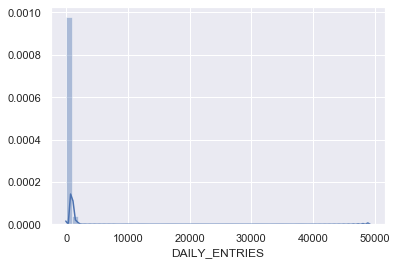

In [181]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 50000])

This is a right-skewed distribution (the mean is to the right of the median). It's good that there are no values less than 0 now, but it seems there are still entry values that are likely too extreme to be sensible. 

### Distribution of daily entries by station, for top 10 stations by volume

In [182]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,09/06/2020,3612.0
1,1 AV,09/07/2020,3485.0
2,1 AV,09/08/2020,5657.0
3,1 AV,09/09/2020,6073.0
4,1 AV,09/10/2020,6049.0


In [183]:
# then get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

In [184]:
#stations_daily["DAY_OF_WEEK"] = stations_daily["DATE"].apply(lambda x: pd.to_datetime(x).strftime("%A"))
stations_daily["DOW_INDEX"] = stations_daily["DATE"].apply(lambda x: pd.to_datetime(x).weekday())
stations_by_day = \
    (stations_daily.groupby(["STATION", "DOW_INDEX"])).mean()
#stations_by_day.groupby(["STATION", "DOW_INDEX"]).mean()
# hue is station?
stations_by_day.index


MultiIndex([(     '1 AV', 0),
            (     '1 AV', 1),
            (     '1 AV', 2),
            (     '1 AV', 3),
            (     '1 AV', 4),
            (     '1 AV', 5),
            (     '1 AV', 6),
            (   '103 ST', 0),
            (   '103 ST', 1),
            (   '103 ST', 2),
            ...
            (  'YORK ST', 4),
            (  'YORK ST', 5),
            (  'YORK ST', 6),
            ('ZEREGA AV', 0),
            ('ZEREGA AV', 1),
            ('ZEREGA AV', 2),
            ('ZEREGA AV', 3),
            ('ZEREGA AV', 4),
            ('ZEREGA AV', 5),
            ('ZEREGA AV', 6)],
           names=['STATION', 'DOW_INDEX'], length=2653)

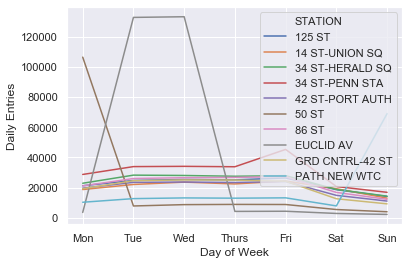

In [185]:
# testing sorting within groupby
stations_daily["DOW_INDEX"] = stations_daily["DATE"].apply(lambda x: pd.to_datetime(x).weekday())
stations_by_day = \
    (stations_daily.groupby(["STATION", "DOW_INDEX"])).mean()\
                    # how would i sort by another column after the fact?

top10_by_day = stations_by_day.loc[list(top10_stations)].reset_index()

the_plt = sns.lineplot(data=top10_by_day, x="DOW_INDEX", y="DAILY_ENTRIES", hue="STATION");

plt.xlabel("Day of Week")
plt.ylabel("Daily Entries")
the_plt.set_xticks(range(7))
the_plt.set_xticklabels(["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"]);
sns.set(rc={'figure.figsize':(20,15)})

In [186]:
from itertools import permutations

top10_list = sorted(top10_stations.values)
top10_perms_5 = list(permutations(top10_list, 5))

# create dataframe where index is the 5-tuple of stations and column is sum of those 5 stations for M, T, ..., F

# index of tuple, elem in tuple
def find_sum(perm):
    return sum(stations_by_day.loc[perm[day], day][0] for day in [0, 1, 2, 3, 4])

entries_per_perm = list(map(find_sum, top10_perms_5))

In [187]:
perm_entries = pd.DataFrame(data=entries_per_perm, index=top10_perms_5, columns=["ENTRIES"]).sort_values(by="ENTRIES", ascending=False)

In [188]:
perm_entries.head(15)

,ENTRIES
"(50 ST, 34 ST-HERALD SQ, EUCLID AV, 86 ST, 34 ST-PENN STA)",340027.666667
"(50 ST, EUCLID AV, 34 ST-HERALD SQ, 86 ST, 34 ST-PENN STA)",339365.666667
"(50 ST, EUCLID AV, 86 ST, 34 ST-HERALD SQ, 34 ST-PENN STA)",338647.333333
"(50 ST, 86 ST, EUCLID AV, 34 ST-HERALD SQ, 34 ST-PENN STA)",338535.000000
"(50 ST, 34 ST-HERALD SQ, EUCLID AV, 125 ST, 34 ST-PENN STA)",338381.000000
"(50 ST, 34 ST-HERALD SQ, EUCLID AV, GRD CNTRL-42 ST, 34 ST-PENN STA)",338261.333333
"(50 ST, EUCLID AV, 34 ST-HERALD SQ, 125 ST, 34 ST-PENN STA)",337719.000000
"(50 ST, EUCLID AV, 34 ST-HERALD SQ, GRD CNTRL-42 ST, 34 ST-PENN STA)",337599.333333
"(50 ST, EUCLID AV, 125 ST, 34 ST-HERALD SQ, 34 ST-PENN STA)",337498.000000
"(50 ST, 125 ST, EUCLID AV, 34 ST-HERALD SQ, 34 ST-PENN STA)",337258.666667


In [189]:
top10_list

['125 ST',
 '14 ST-UNION SQ',
 '34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '42 ST-PORT AUTH',
 '50 ST',
 '86 ST',
 'EUCLID AV',
 'GRD CNTRL-42 ST',
 'PATH NEW WTC']

In [190]:
stations_daily["STATION"]

0            1 AV
1            1 AV
2            1 AV
3            1 AV
4            1 AV
          ...    
7574    ZEREGA AV
7575    ZEREGA AV
7576    ZEREGA AV
7577    ZEREGA AV
7578    ZEREGA AV
Name: STATION, Length: 7579, dtype: object

In [191]:
from scipy.optimize import linear_sum_assignment
drop_non_top10 = stations_daily[[stat in top10_list for stat in stations_daily["STATION"]]]
regroup_top10 = drop_non_top10.groupby(["DOW_INDEX", "STATION"])["DAILY_ENTRIES"].mean()
regroup_top10.head(30)

DOW_INDEX  STATION        
0          125 ST              21315.666667
           14 ST-UNION SQ      18793.333333
           34 ST-HERALD SQ     22960.333333
           34 ST-PENN STA      28774.666667
           42 ST-PORT AUTH     19711.000000
           50 ST              106397.666667
           86 ST               21206.000000
           EUCLID AV            3633.333333
           GRD CNTRL-42 ST     19344.000000
           PATH NEW WTC        10381.333333
1          125 ST              24803.666667
           14 ST-UNION SQ      22149.000000
           34 ST-HERALD SQ     28324.000000
           34 ST-PENN STA      33969.333333
           42 ST-PORT AUTH     23544.333333
           50 ST                7921.666667
           86 ST               26080.000000
           EUCLID AV          132697.666667
           GRD CNTRL-42 ST     24654.000000
           PATH NEW WTC        12782.000000
2          125 ST              25478.666667
           14 ST-UNION SQ      23704.666667
     

In [192]:
from scipy.optimize import linear_sum_assignment
cost_array = np.array([list(-regroup_top10.loc[day]) for day in [0, 1, 2, 3, 4]])
days, stations = linear_sum_assignment(cost_array)
[top10_list[station] for station in stations]

['50 ST', '34 ST-HERALD SQ', 'EUCLID AV', '86 ST', '34 ST-PENN STA']

In [193]:
from scipy.optimize import linear_sum_assignment
regroup_all = drop_non_top10.groupby(["DOW_INDEX", "STATION"])["DAILY_ENTRIES"].mean()
cost_array_all = np.array([list(-regroup_all.loc[day]) for day in [0, 1, 2, 3, 4]])
days, stations_all = linear_sum_assignment(cost_array_all)
[top10_list[station] for station in stations_all]

['50 ST', '34 ST-HERALD SQ', 'EUCLID AV', '86 ST', '34 ST-PENN STA']

In [194]:
# can now present optimal solutions for 1, 2, 3 teams per day perhaps

In [195]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

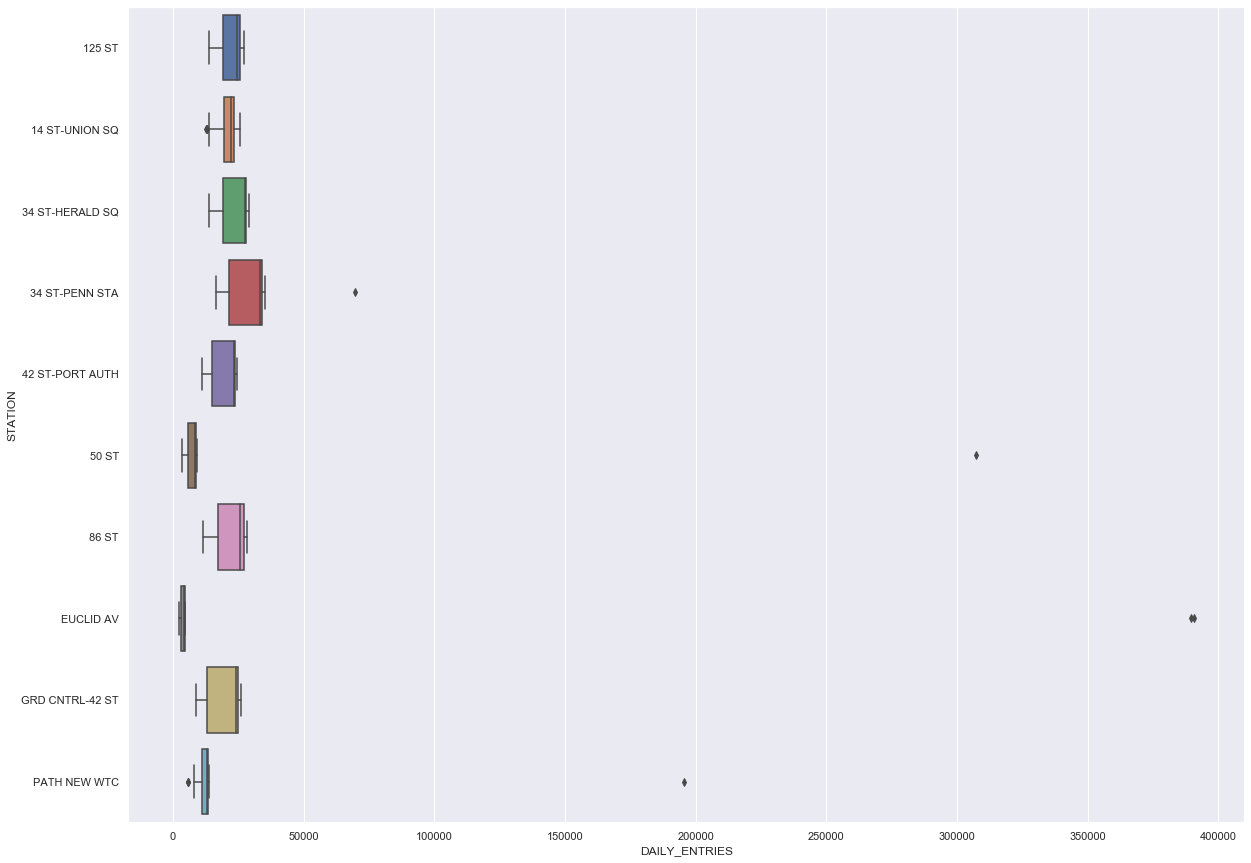

In [196]:
# use seaborn to create a boxplot by station
sns.boxplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top10)

Two key things we should notice from these quick EDA steps:

- Using our knowledge of NYC, it **doesn't seem right that these are the top 10 stations**. Some are reasonable like grand central and times square, but is 23rd street really that popular? A next step here would be to dig into turnstiles in "23 ST" (hint: check the line names for different instances of 23 ST, is it really one station?) 


- There's still a **clear outlier in daily traffic for Canal St**, we should be able to figure out what's causing this by digging into it. Maybe our cleaning process is not quite enough yet (1 million is too large a cutoff!)